In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("train.csv", encoding="latin1")
df.head()


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df = pd.read_csv("train.csv", encoding="latin1")
df.drop(['textID', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'], axis=1, inplace=True)
df.head()


,text,selected_text,sentiment,Time of Tweet,Age of User
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30
2,my boss is bullying me...,bullying me,negative,night,31-45
3,what interview! leave me alone,leave me alone,negative,morning,46-60
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70


In [ ]:
df['sentiment'].value_counts()


,count
sentiment,
neutral,11118
positive,8582
negative,7781


In [ ]:
df['text'] = df['text'].fillna("")


In [ ]:

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)


In [ ]:
df['clean_text'] = df['text'].apply(clean_text)


In [ ]:
df['sentiment'] = df['sentiment'].map({
    'negative': 0,
    'neutral': 1,
    'positive': 2
})


In [ ]:
X = df['clean_text']
y = df['sentiment']



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3,5),
    min_df=5,
    sublinear_tf=True
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)




In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.6909
Naive Bayes Accuracy: 0.6307
SVM Accuracy: 0.6644


In [ ]:
best_model = models["SVM"]

y_pred = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.63      0.65      1556
           1       0.62      0.67      0.64      2224
           2       0.73      0.69      0.71      1717

    accuracy                           0.66      5497
   macro avg       0.67      0.66      0.67      5497
weighted avg       0.67      0.66      0.66      5497



In [ ]:
joblib.dump(best_model, "best_sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

# **Testing the Model**

In [ ]:
test_df = pd.read_csv("train.csv", encoding="latin1")
test_df.head()


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df = pd.read_csv("train.csv", encoding="latin1")
df.drop(['textID', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'], axis=1, inplace=True)
df.head()


,text,selected_text,sentiment,Time of Tweet,Age of User
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30
2,my boss is bullying me...,bullying me,negative,night,31-45
3,what interview! leave me alone,leave me alone,negative,morning,46-60
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70


In [ ]:
test_df.columns


Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [ ]:
"""testing the model"""


#  CREATE clean_text
test_df['clean_text'] = test_df['text'].apply(clean_text)

# Encode sentiment labels
test_df['sentiment'] = test_df['sentiment'].map({
    'negative': 0,
    'neutral': 1,
    'positive': 2
})

# Drop rows where sentiment is missing
test_df = test_df.dropna(subset=['sentiment'])

# Vectorize test data
X_test_final = vectorizer.transform(test_df['clean_text'])
y_test_final = test_df['sentiment']

# Predict
test_predictions = best_model.predict(X_test_final)

# Evaluation
print("Final Test Accuracy:", accuracy_score(y_test_final, test_predictions))
print(classification_report(y_test_final, test_predictions))

# Optional: readable labels
test_df['predicted_sentiment'] = test_predictions
test_df['predicted_sentiment'] = test_df['predicted_sentiment'].map({
    0: 'negative',
    1: 'neutral',
    2: 'positive'
})

test_df[['text', 'predicted_sentiment']].head()



Final Test Accuracy: 0.8930897711145883
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7781
           1       0.88      0.89      0.88     11118
           2       0.91      0.91      0.91      8582

    accuracy                           0.89     27481
   macro avg       0.89      0.89      0.89     27481
weighted avg       0.89      0.89      0.89     27481



,text,predicted_sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",neutral


In [ ]:
test_df['sentiment'].isna().sum()


np.int64(0)

try to increase accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10]
}

svm = LinearSVC()

grid = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid.fit(X_train_tfidf, y_train)

best_svm = grid.best_estimator_
print("Best C:", grid.best_params_)


Best C: {'C': 0.1}


In [ ]:
vectorizer = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1,3),
    min_df=3,
    sublinear_tf=True
)


In [ ]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(21984, 50620)
(5497, 50620)


checking wheater model Accuracy comparison chart (LR vs NB vs SVM) did we done this

In [ ]:
#This loop trains multiple ML models one by one, tests them on the test data, calculates accuracy for each

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.6909
Naive Bayes Accuracy: 0.6307
SVM Accuracy: 0.6644


In [ ]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc


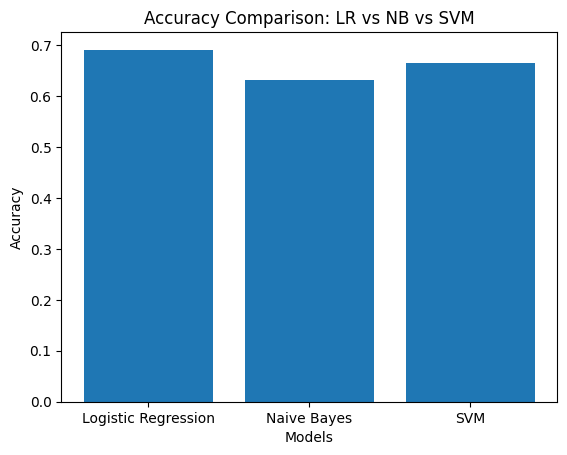

In [ ]:
import matplotlib.pyplot as plt

model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure()
plt.bar(model_names, accuracy_values)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: LR vs NB vs SVM")
plt.show()


website deployment

In [ ]:
!pip install streamlit joblib nltk pyngrok


In [ ]:
import streamlit as st
import joblib
import re
import nltk
import numpy as np
from nltk.corpus import stopwords

nltk.download('stopwords')

model = joblib.load("best_sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [w for w in text if w not in stop_words]
    return ' '.join(text)

st.title("💬 Sentiment Analysis Web App")

user_input = st.text_area("Enter text")

if st.button("Analyze Sentiment"):
    if user_input.strip() == "":
        st.warning("Please enter some text")
    else:
        cleaned = clean_text(user_input)
        vector = vectorizer.transform([cleaned])

        prediction = model.predict(vector)[0]
        decision_scores = model.decision_function(vector)

        confidence = np.max(decision_scores)
        confidence_pct = round(
            (confidence / np.sum(np.abs(decision_scores))) * 100, 2
        )

        if prediction == 0:
            st.error("😠 Negative")
        elif prediction == 1:
            st.info("😐 Neutral")
        else:
            st.success("😊 Positive")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2026-01-16 07:56:01.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:56:01.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:56:01.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:56:01.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:56:01.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:56:01.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 07:56:01.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.

In [ ]:
!pip install streamlit pyngrok joblib nltk


In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("38ElXPoPDWwS6L6wyNPytnmQO7q_3YNpKpBpcffyugn98LYaF")


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(public_url)


NgrokTunnel: "https://unsucceeded-carmella-tautologic.ngrok-free.dev" -> "http://localhost:8501"
